In [51]:
!pip install tensorflow

In [52]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [53]:

(x_train,y_train),(x_test,y_test)= datasets.cifar10.load_data()

In [54]:
x_train.shape

(50000, 32, 32, 3)

In [55]:
x_test.shape

(10000, 32, 32, 3)

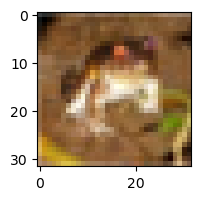

In [56]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[0])

In [57]:
Classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

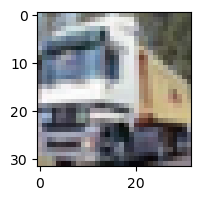

In [58]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[1])

In [59]:
y_train.shape

(50000, 1)

In [60]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [61]:
y_train = y_train.reshape(-1, )
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [62]:
def plot_sample(x,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(Classes[y[index]])

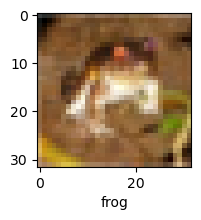

In [63]:
plot_sample(x_train,y_train,0)

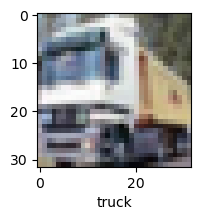

In [64]:
plot_sample(x_train,y_train,1)

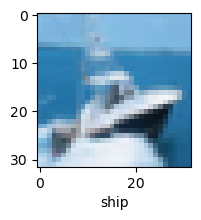

In [65]:
plot_sample(x_train,y_train,8)

In [66]:
x_train = x_train/255
x_test = x_test/255

In [67]:
ann = models.Sequential([
      layers.Flatten(input_shape = (32,32,3)),
      layers.Dense(3000,activation = "relu"),
      layers.Dense(10,activation = "sigmoid") 
]) 

ann.compile(optimizer = "SGD",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"]) 
ann.fit(x_train,y_train,epochs = 5)

    
    
    
    


C:\Users\abc\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 32ms/step - accuracy: 0.2998 - loss: 1.9562
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.4119 - loss: 1.6742
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.4451 - loss: 1.5852
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4693 - loss: 1.5187
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.4809 - loss: 1.4867


In [68]:
ann.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4585 - loss: 1.5232


[1.5306850671768188, 0.4507000148296356]

In [70]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann.predict(x_test) 
y_pred_Classes =[np.argmax(element) for element in y_pred]
print("Classification Report:\ n",classification_report(y_test,y_pred_Classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Classification Report:\ n               precision    recall  f1-score   support

           0       0.60      0.42      0.49      1000
           1       0.69      0.42      0.52      1000
           2       0.39      0.32      0.35      1000
           3       0.44      0.13      0.20      1000
           4       0.32      0.60      0.41      1000
           5       0.35      0.47      0.40      1000
           6       0.52      0.50      0.51      1000
           7       0.57      0.43      0.49      1000
           8       0.42      0.77      0.55      1000
           9       0.58      0.45      0.51      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.44     10000
weighted avg       0.49      0.45      0.44     10000



In [73]:
cnn = models.Sequential([
      layers.Conv2D(filters = 32,kernel_size = (3,3),activation = "relu",input_shape=(32,32,3)),
      layers.MaxPooling2D((2,2)),
    
      layers.Conv2D(filters = 64,kernel_size = (3,3),activation = "relu"),
      layers.MaxPooling2D((2,2)), 
    #dense
      layers.Flatten(),
      layers.Dense(64,activation = "relu"),
      layers.Dense(10,activation = "softmax") 
])

C:\Users\abc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
cnn.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])
cnn.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.3761 - loss: 1.7114
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5931 - loss: 1.1614
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6546 - loss: 1.0027
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6804 - loss: 0.9124
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7143 - loss: 0.8313
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7294 - loss: 0.7723
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7475 - loss: 0.7304
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7611 - loss: 0.6868
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7762 - loss: 0.6379
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7895 - loss: 0.6027


In [75]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6956 - loss: 0.9241


[0.9239212870597839, 0.6962000131607056]

In [76]:
y_test[0:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [80]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

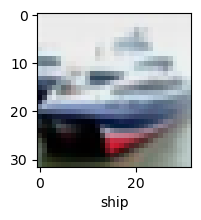

In [79]:
plot_sample(x_test,y_test,1)

In [81]:
y_pred = cnn.predict(x_test) 
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


array([[4.7321961e-04, 3.4770634e-04, 1.3726738e-03, 8.5973382e-01,
        3.5651319e-04, 2.3332834e-02, 1.5040029e-02, 3.2519462e-04,
        9.6765079e-02, 2.2528442e-03],
       [5.0421935e-02, 2.0993429e-01, 1.3733699e-04, 2.1329335e-05,
        1.2096930e-06, 4.1129522e-07, 2.8996050e-07, 1.4909535e-06,
        7.3493671e-01, 4.5449710e-03],
       [1.8126890e-01, 1.0350824e-01, 1.1541107e-02, 1.7683342e-02,
        4.8242421e-03, 1.1530154e-03, 1.3531134e-03, 1.1522443e-03,
        6.7192841e-01, 5.5873259e-03],
       [9.5336729e-01, 2.8172869e-02, 3.3228991e-03, 3.0163542e-04,
        2.2714511e-03, 3.9971360e-06, 7.4969689e-06, 5.0130897e-05,
        1.1561615e-02, 9.4064983e-04],
       [2.9613209e-06, 3.3182682e-06, 2.0927193e-02, 1.5479343e-01,
        4.8532143e-01, 7.1057882e-03, 3.3178738e-01, 3.9591519e-05,
        7.2212506e-06, 1.1672589e-05]], dtype=float32)

In [82]:
y_Classes = [np.argmax(element)for element in y_pred]
y_Classes[:5]

[3, 8, 8, 0, 4]

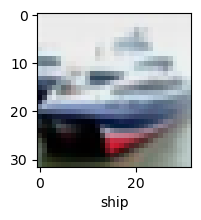

In [83]:
plot_sample(x_test,y_test,1)

In [84]:
Classes[y_Classes[1]]

'ship'

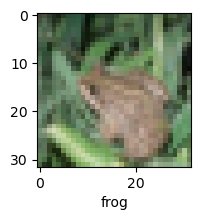

In [85]:
plot_sample(x_test,y_test,4)

In [86]:
Classes[y_Classes[4]]

'deer'

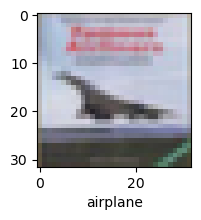

In [92]:
plot_sample(x_test,y_test,3)

In [93]:
Classes[y_Classes[3]]

'airplane'

In [94]:
print("Classification Report: \n",classification_report(y_test,y_Classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.83      0.80      0.81      1000
           2       0.62      0.55      0.58      1000
           3       0.49      0.52      0.51      1000
           4       0.67      0.59      0.63      1000
           5       0.59      0.63      0.61      1000
           6       0.76      0.76      0.76      1000
           7       0.71      0.76      0.73      1000
           8       0.80      0.82      0.81      1000
           9       0.79      0.76      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

